# 多重スリットにおける回折・干渉実験の光の強度分布(2次元版)

### 必要なライブラリのインポート

In [1]:
#%matplotlib notebook
import numpy as np
import cmath
import numba
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator

### 各種設定

In [2]:
# スリットースクリーン間距離
L = 1.0*10**3
# 光の波長
lam = 4.0*10**(-4)
# スクリーンの初期位置
x_0 = 10.0
# x軸方向のスリット間距離
dx = 0.1
# y軸方向のスリット幅
dy = 0.1
# 波数
k = (2*np.pi)/lam
# スリット数(奇数限定)
N = 3
n = (N-1)*0.5
# スリット幅の配列
x_slit_count = np.arange(-n, n+1)
# スクリーン上の各点との距離を格納するリストの用意
R_points = []

### numpy.meshgrid()を利用するための格子点の設定

In [3]:
# 格子の分割数
m = 65
# スクリーンのx,y座標の設定
X,Y = np.meshgrid(np.linspace(-x_0, x_0, m), np.linspace(-x_0, x_0, m))
# 強度分布格納用配列の初期化
I_points = np.zeros([m, m])

### 各スリットからスクリーン上の点までの距離の計算

In [4]:
for i in x_slit_count:
    R = np.sqrt(L**2+(X-i*dx)**2+(Y-0.5*i*dy)**2)
    R_points.append(R)

In [5]:
# リストを配列に変換
R_points = np.array(R_points)

### 波の重ね合わせ（繰り返し処理）

In [6]:
for s in range(m):
    count = 0
    for t in range(m):
        # 電場の初期化
        E = 0
        for u in range(N):
            # 電場の計算
            E += cmath.exp(1j*k*R_points[u, s, t])
        # 光強度の計算結果を格納
        I_points[s, count] = np.abs(E)**2
        count += 1

### 光の強度分布，干渉縞のグラフ化

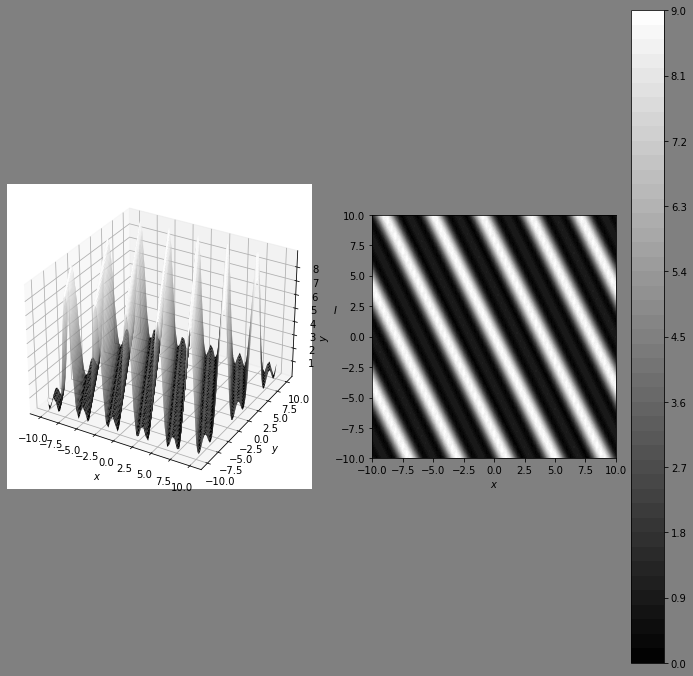

In [7]:
# https://learntutorials.net/ja/matplotlib/topic/3385/%E3%82%AB%E3%83%A9%E3%83%BC%E3%83%9E%E3%83%83%E3%83%97
fig = plt.figure(
    figsize = (12, 12),
    facecolor = "gray",
    edgecolor = "black",
)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, I_points, rstride=1, cstride=1, cmap='gist_gray')

ax2 = fig.add_subplot(122)
cf = ax2.contourf(X, Y, I_points, 51, vmin=I_points.min(), vmax=I_points.max(), cmap='gist_gray')
cbar = fig.colorbar(cf)
cbar.locator = LinearLocator(numticks = 11)
cbar.update_ticks()

for ax in {ax1, ax2}:
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

ax1.set_zlabel(r'$I$')
ax2.set_aspect('equal')

In [8]:
# グラフの保存
import datetime
import pytz
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)

#見やすい形に変換
time = time.strftime('%m%d_2D_varsion2.png')
# 図の保存
fig.savefig(time, facecolor = fig.get_facecolor())